# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Jared (Ruotian) Chen
- Jimin Cheon
- Kane Gu
- Laurence D'Ercole
- Nisha Davankar

<a id='research_question'></a>
# Research Question

What attributes of a YouTube video affect its popularity in United States?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Factors that would potentially **affect** a video's popularity:
- time created: `time`
- duration: `length`
- number of tags: `tags`
- video category: `category`
- video quality: `video.quality`
- ad placement: `has_ad	has_ad_at_beginning`
- popularity of youtuber
    - time youtuber joined youtube: `creator.time`
    - number of followers: `creator.stats.follower`
    - total number of views: `creator.stats.view`
    - total number of videos: `creator.stats.post`

Factors that **determine** a video's long-term popularity:
- like/dislike ratio: `stats.like	stats.dislike`
- number of comments: `stats.comment`
- number of views: `stats.view`

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [12]:
import sys

!{sys.executable} -m pip install --quiet --user --upgrade pandas==1.* numpy matplotlib
!{sys.executable} -m pip install --quiet --user --upgrade -r EDA/requirements.txt

In [13]:
from EDA.goodies import *

In [14]:
from EDA.dcollect import restful
from EDA.dcollect import api_youtube as youtube
from EDA.dcollect import api_youtubei as youtubei

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

Describe your data cleaning steps here.

In [33]:
dataset_id = 'random'

In [35]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

'''
import string
keyword = '|'.join(string.ascii_letters)



df_search_details = pd.read_pickle(f'EDA/dsamples/youtube_search_{as_fname(keyword)}_{dataset_id}.pkl')

# optional (extra info about channels in our search result)
#df_search_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_search_channels_{as_fname(keyword)}_{dataset_id}.pkl')

'''


df_search_details = pd.read_pickle('EDA/dsamples/youtube_search_random_ascii.pkl')
# optional (extra info about channels in our search result)
#df_search_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_search_channels_{as_fname(keyword)}_{dataset_id}.pkl')

df_search_details = df_drop_duplicates(df_search_details, level = 'id')
df_report(df_search_details, name = 'Search Results')

---

# Results - Search Results

## Data Preview

,,title,description,time,length,tags,category,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,creator.id,,,,,,,,,,,,,
-I7KQF5Cdzk,UCeiu2GymrRNIMHmNwhjDfiQ,I've Got The World On A String,Hattie navigates office politics on her first ...,2020-03-13 19:45:02+00:00,0 days 00:22:46,NaN,Shows,10.0,0.0,1.0,NaN,HD,False,False
-isS7wDu1xM,UC3XhaT6BaUrwnjB5QMxbY2A,...and a Texas Showdown,Four Texas friends who are about to become bri...,2018-07-26 08:29:25+00:00,0 days 01:25:38,NaN,Shows,4.0,2.0,0.0,NaN,HD,False,False
1eHxTm71QMA,UC97gPavbJtiaRXbpLlQISsw,A Little Pregnancy Goes a Long Way,"To their husbands’ chagrin, the grandmothers-t...",2015-03-27 06:45:54+00:00,0 days 00:25:07,NaN,Shows,0.0,0.0,0.0,NaN,SD,False,False
1hzch2hppPI,UCC_du0S_gfXVkK_mxvBcJaw,Bonus Bucks,"Lucy and Ethel argue over the ownership of a ""...",2015-09-24 21:32:07+00:00,0 days 00:26:01,NaN,Shows,10.0,0.0,1.0,NaN,HD,False,False
44KdPJvYB1s,UCn4ixrTeRoCHD8fyAW6_nlQ,Jared Has Aides,As the country becomes obsessed with a popular...,2014-06-15 04:00:22+00:00,0 days 00:22:13,NaN,Shows,59.0,27.0,0.0,NaN,HD,False,False


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,57,57.000000,57.000000,53.000000,1.900000e+01
mean,0 days 00:47:47.508771929,1405.403509,190.807018,188.811321,1.953805e+05
std,0 days 00:40:05.770845597,4719.944718,802.207589,669.287711,3.297752e+05
min,0 days 00:00:43,0.000000,0.000000,0.000000,3.434000e+03
25%,0 days 00:21:07,4.000000,0.000000,0.000000,6.067150e+04
50%,0 days 00:35:18,49.000000,7.000000,0.000000,1.058410e+05
75%,0 days 01:29:11,542.000000,53.000000,68.000000,2.077020e+05
max,0 days 02:25:02,33906.000000,5482.000000,4550.000000,1.503715e+06


---

In [17]:
assert(youtube.types.topic(1).__eq__('Film & Animation'))


df_search_details_n = df_search_details.copy()
df_search_details_n['category'] = df_search_details_n['category'].astype(str)


df_search_details_n.groupby(['category'])['stats.view'].mean()




category
Comedy                   3.058450e+06
Entertainment            1.510796e+06
Film & Animation         1.010990e+06
Movies                            NaN
Music                    1.974051e+07
News & Politics          6.860758e+05
Nonprofits & Activism    1.653966e+06
Science & Technology     6.537050e+04
Shows                             NaN
Sports                   6.535793e+05
Name: stats.view, dtype: float64

In [18]:
df_trending_details = pd.read_pickle('EDA/dsamples/youtube_trending.pkl')

# optional (extra info about channels on the chart)
df_trending_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_trending_channels.pkl')

df_report(df_trending_details, name = 'Trending')

---

# Results - Trending

## Data Preview

,,title,description,time,length,tags,category,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,creator.id,,,,,,,,,,,,,
sG9rX6Ifzhw,UCq18eeL7D9Vd8DhjMcLh9QQ,Piers and Alex Clash Over Prince Harry and Meg...,Following the Duke and Duchess of Sussex’s lan...,2021-03-09 10:58:19+00:00,0 days 00:14:05,"[good morning britain, breakfast show, news, m...",Entertainment,46817,7645,NaN,4144988,HD,True,True
CkTVoLamPio,UC-SJ6nODDmufqBzPBwCvYvQ,"Meghan, Duchess of Sussex, opens up about her ...","For the first time Meghan, Duchess of Sussex, ...",2021-03-08 14:01:55+00:00,0 days 00:10:19,"[cbs this morning, duchess of sussex, Meghan M...",News & Politics,51245,11042,12387.0,6580878,HD,True,True
pIQIKIDZJjc,UCi3OE-aN09WOcN9d2stCvPg,David Dobrik & I Bought Markell A Car | Charli...,hi everyone. i wanted to organize this with @D...,2021-03-09 18:00:12+00:00,0 days 00:11:26,"[charli, charlie, charli d'amelio, charli dame...",People & Blogs,130353,4796,9655.0,1415497,HD,True,True
jJdlgKzVsnI,UCpTaAz_BxtkUB1qc8JTU_7g,Doja Cat - Streets (Official Video),Doja Cat // Streets (Official Video)\nHot Pink...,2021-03-09 05:00:12+00:00,0 days 00:04:34,"[doja cat, streets, doja, doja cat streets, st...",Music,869472,8405,56206.0,7154068,HD,True,True
qUUloBe5vEo,UCRijo3ddMTht_IHyNSNXpNQ,Longest Dunk Wins,Slippery Stairs and a GIANT catapult!?! Today'...,2021-03-08 23:00:02+00:00,0 days 00:10:19,"[dude perfect, dude perfect stereotypes, dude ...",Sports,371935,4280,13898.0,7541282,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,200,2.000000e+02,200.000000,194.000000,2.000000e+02
mean,0 days 00:10:06.850000,1.444683e+05,2372.630000,13496.324742,2.705343e+06
std,0 days 00:09:27.893274618,2.600882e+05,3428.171371,30690.249011,3.830323e+06
min,0 days 00:00:12,7.190000e+02,58.000000,103.000000,1.503920e+05
25%,0 days 00:03:18.250000,2.120500e+04,431.000000,2264.500000,7.208925e+05
50%,0 days 00:07:32.500000,5.213300e+04,961.500000,4552.500000,1.303486e+06
75%,0 days 00:13:22,1.268155e+05,2749.000000,12074.500000,2.943700e+06
max,0 days 00:54:22,1.743261e+06,21802.000000,295502.000000,2.482087e+07


---

In [19]:
#We first reset the index of the dataframe
df_trending_details= df_trending_details.reset_index()

In [20]:
#We clean the unecessary information such as dislikes, creator time, creater stats view and creater stats posts

'''
del df_trending_details['id']
del df_trending_details['creator.id']
del df_trending_details['stats.dislike']
del df_trending_details['creator.time']
del df_trending_details['creator.stats.view']
del df_trending_details['creator.stats.post']
'''

"\ndel df_trending_details['id']\ndel df_trending_details['creator.id']\ndel df_trending_details['stats.dislike']\ndel df_trending_details['creator.time']\ndel df_trending_details['creator.stats.view']\ndel df_trending_details['creator.stats.post']\n"

In [21]:
#we group the data by if there are ads in the begining and caluculte the mean value of likes, comments and views
has_ad_likes = df_trending_details.groupby(['has_ad_at_beginning'])['stats.like'].mean()
has_ad_comments = df_trending_details.groupby(['has_ad_at_beginning'])['stats.comment'].mean()
has_ad_views = df_trending_details.groupby(['has_ad_at_beginning'])['stats.view'].mean()

has_ad_likes.reset_index()
has_ad_comments.reset_index()
has_ad_views.reset_index()

,has_ad_at_beginning,stats.like
0,False,204042.656250
1,True,133120.857143


,has_ad_at_beginning,stats.comment
0,False,19127.645161
1,True,12425.337423


,has_ad_at_beginning,stats.view
0,False,3.282382e+06
1,True,2.595431e+06


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'Average likes')

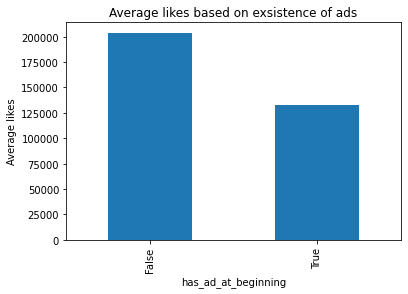

Text(0, 0.5, 'Average comments')

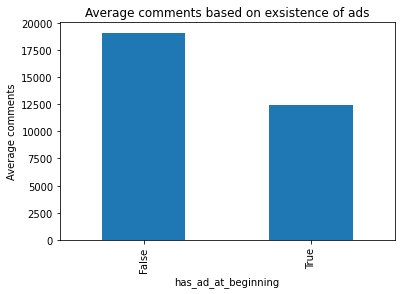

Text(0, 0.5, 'Average views')

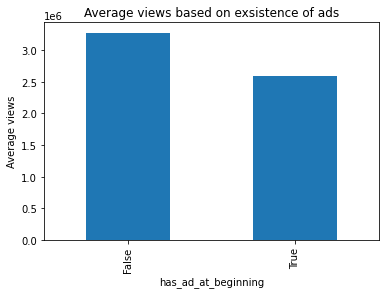

In [22]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
ax_likes = has_ad_likes.plot.bar(x= 'has_ad_at_beginning', y= 'stats.like', title= "Average likes based on exsistence of ads")
ax_likes.set_ylabel("Average likes")
plt.show()
ax_comments= has_ad_comments.plot.bar(x= 'has_ad_at_beginning', y= 'stats.comment',  title= "Average comments based on exsistence of ads")
ax_comments.set_ylabel("Average comments")
plt.show()
ax_views= has_ad_views.plot.bar(x= 'has_ad_at_beginning', y= 'stats.view', title= "Average views based on exsistence of ads")
ax_views.set_ylabel("Average views")
plt.show()

The plots above compare the vidoes that had an ad at the begining of the vidoe and videos that do not have ads at the begining of a video. The first plot compares has_ad_at_begining to the average likes. The second plot compares has_ad_at_begining to average comments and the final lot compares has_ad_at_begining to average views. We can see that in all three cases, the popularity of the videos is higher when there is an ad attached to the video. We have to take into consideration that the number of videos that have ads are higher than the videos with out ads. This might is affect the data by creating a bias due to the differnce in number of both cactegories. 

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*